In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df_fans = pd.read_csv("../data/interim/_Core_Fans_Tweets_500k_clean_removed_stopwords_no_lem.csv")


In [13]:
df_fans

,Username,ID,Date Created,Tweet,Nr of Likes,Language,Tweet_clean,floatcheck
0,Giina🍫,1588892299840610304,2022-11-05 13:53:39+00:00,@BoetMuzzie You live in Matsulu 😭 I'm in Nkomazi.,0,in,BoetMuzzie live Matsulu Nkomazi,NaN
1,Giina🍫,1588889928192364546,2022-11-05 13:44:13+00:00,RT @antony00: Don’t dream it’s over…!! 🏴󠁧󠁢󠁥󠁮󠁧󠁿...,0,en,RT antony Not dream ManUtd,NaN
2,Giina🍫,1588889625694982144,2022-11-05 13:43:01+00:00,@BoetMuzzie 🥂🥂🥂🥂,1,und,BoetMuzzie,NaN
3,Giina🍫,1588889532828889088,2022-11-05 13:42:39+00:00,RT @AfcGabeast: Klopp whenever Liverpool conce...,0,en,RT AfcGabeast Klopp whenever Liverpool concede...,NaN
4,Giina🍫,1588889511563759616,2022-11-05 13:42:34+00:00,@Blaizer04424551 @AfcGabeast Ende literally 🤣😭,0,en,Blaizer AfcGabeast Ende literally,NaN
...,...,...,...,...,...,...,...,...
491104,Black Superman ❁,1583873872721375232,2022-10-22 17:32:12+00:00,RT @dezizuoo: Now you know why I hate Ronaldo ...,0,en,RT dezizuoo know hate Ronaldo FC stcooEEBgMrw,NaN
491105,Black Superman ❁,1583851160347480064,2022-10-22 16:01:57+00:00,RT @sportbible: Dean Henderson gives the middl...,0,en,RT sportbible Dean Henderson gives middle fing...,NaN
491106,Black Superman ❁,1583850900481011712,2022-10-22 16:00:55+00:00,RT @crim_tweets_: https://t.co/y9YdWBZYA1,0,zxx,RT crimtweets stcoyYdWBZYA,NaN
491107,Black Superman ❁,1583827665165119489,2022-10-22 14:28:36+00:00,RT @EvilRashford: @Football__Tweet https://t.c...,0,qme,RT EvilRashford FootballTweet stcoIGgNrCRcz,NaN


In [14]:
df_fans["Tweet_clean"] = df_fans["Tweet_clean"].astype(str)

In [15]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df_fans['Polarity'] = df_fans['Tweet_clean'].apply(getPolarity)
df_fans.head()

,Username,ID,Date Created,Tweet,Nr of Likes,Language,Tweet_clean,floatcheck,Polarity
0,Giina🍫,1588892299840610304,2022-11-05 13:53:39+00:00,@BoetMuzzie You live in Matsulu 😭 I'm in Nkomazi.,0,in,BoetMuzzie live Matsulu Nkomazi,NaN,0.136364
1,Giina🍫,1588889928192364546,2022-11-05 13:44:13+00:00,RT @antony00: Don’t dream it’s over…!! 🏴󠁧󠁢󠁥󠁮󠁧󠁿...,0,en,RT antony Not dream ManUtd,NaN,0.000000
2,Giina🍫,1588889625694982144,2022-11-05 13:43:01+00:00,@BoetMuzzie 🥂🥂🥂🥂,1,und,BoetMuzzie,NaN,0.000000
3,Giina🍫,1588889532828889088,2022-11-05 13:42:39+00:00,RT @AfcGabeast: Klopp whenever Liverpool conce...,0,en,RT AfcGabeast Klopp whenever Liverpool concede...,NaN,0.000000
4,Giina🍫,1588889511563759616,2022-11-05 13:42:34+00:00,@Blaizer04424551 @AfcGabeast Ende literally 🤣😭,0,en,Blaizer AfcGabeast Ende literally,NaN,0.000000


In [17]:
data=df_fans[['Tweet_clean','Polarity']]

data

,Tweet_clean,Polarity
0,BoetMuzzie live Matsulu Nkomazi,0.136364
1,RT antony Not dream ManUtd,0.000000
2,BoetMuzzie,0.000000
3,RT AfcGabeast Klopp whenever Liverpool concede...,0.000000
4,Blaizer AfcGabeast Ende literally,0.000000
...,...,...
491104,RT dezizuoo know hate Ronaldo FC stcooEEBgMrw,-0.800000
491105,RT sportbible Dean Henderson gives middle fing...,0.000000
491106,RT crimtweets stcoyYdWBZYA,0.000000
491107,RT EvilRashford FootballTweet stcoIGgNrCRcz,0.000000


In [18]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df_fans['Sentiment'] = df_fans['Polarity'].apply(getAnalysis )
df_fans.to_csv("../../../data/processed/_Core_Fans_Tweets_500k_clean_removed_stopwords_no_lem_with_sentiment_and_polarity.csv")
df_fans.head()


,Username,ID,Date Created,Tweet,Nr of Likes,Language,Tweet_clean,floatcheck,Polarity,Sentiment
0,Giina🍫,1588892299840610304,2022-11-05 13:53:39+00:00,@BoetMuzzie You live in Matsulu 😭 I'm in Nkomazi.,0,in,BoetMuzzie live Matsulu Nkomazi,NaN,0.136364,Positive
1,Giina🍫,1588889928192364546,2022-11-05 13:44:13+00:00,RT @antony00: Don’t dream it’s over…!! 🏴󠁧󠁢󠁥󠁮󠁧󠁿...,0,en,RT antony Not dream ManUtd,NaN,0.000000,Neutral
2,Giina🍫,1588889625694982144,2022-11-05 13:43:01+00:00,@BoetMuzzie 🥂🥂🥂🥂,1,und,BoetMuzzie,NaN,0.000000,Neutral
3,Giina🍫,1588889532828889088,2022-11-05 13:42:39+00:00,RT @AfcGabeast: Klopp whenever Liverpool conce...,0,en,RT AfcGabeast Klopp whenever Liverpool concede...,NaN,0.000000,Neutral
4,Giina🍫,1588889511563759616,2022-11-05 13:42:34+00:00,@Blaizer04424551 @AfcGabeast Ende literally 🤣😭,0,en,Blaizer AfcGabeast Ende literally,NaN,0.000000,Neutral


In [19]:
temp = df_fans.groupby("Sentiment").count()["Tweet_clean"].reset_index().sort_values(by="Tweet_clean", ascending=False)
temp.style.background_gradient(cmap="Purples")

,Sentiment,Tweet_clean
1,Neutral,252338
2,Positive,169266
0,Negative,69505


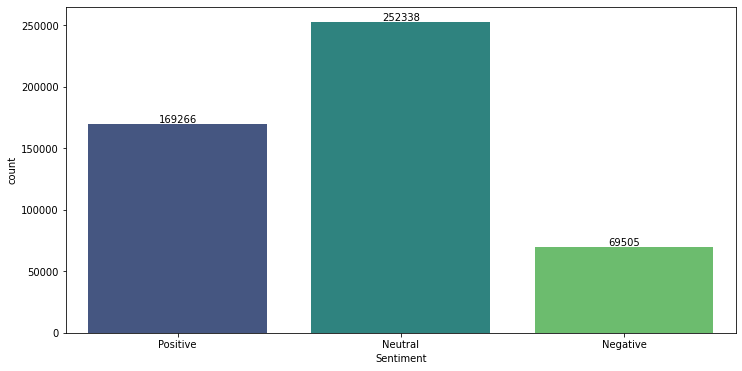

In [23]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(x="Sentiment", data=df_fans, palette="viridis")
ax.bar_label(ax.containers[0]);